In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1 (Programming) Replicate Figure 9.3 (page 309) of Elements of Statistical Learning II
(include the non-scaled version). What are the main differences between the three
indexes (Gini index, classification error, and entropy)?


Missclassification error: 1 - max(p, 1-p), 
Gini index: 2 * p * (1-p), 
Cross-entropy: - (p * log(p) + (1-p) * log(1-p)), 

Entropy is most sensitive, followed by GIni and then missclassification error.
Gini and Entropy provide more effective tree growth since they respond better to changes in class probabilites.
Entropy tends to produce best splits in terms of reducing misclassifications but is computationally more expensive (log). GIni is a good tradeoff. 

Entropy best in imbalanced datasets, Gini for CART but both are numerically similar and good for growing trees. Missclassification error is not used much (mainly when pruning for accuracy).


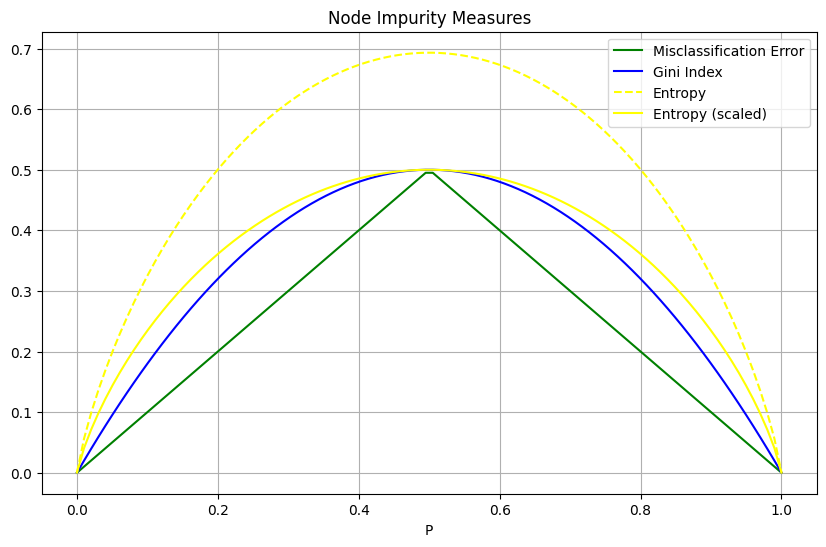

In [3]:
# range of porbs
p = np.linspace(0, 1, 100)

# Misclassification error: 1 - max(p, 1-p)
misclassification_error = 1 - np.maximum(p, 1-p)

# Gini index
gini_index = 2 * p * (1 - p)

# Cross-entropy
EPSILON = 1e-10 # avoid log 0
cross_entropy = -(p * np.log(p + EPSILON) + (1 - p) * np.log(1 - p + EPSILON))

# scaled entropy so that it passes through (0.5, 0.5)
# entropy at 0.5
scaled_cross_entropy =  cross_entropy * (0.5 / -(0.5 * np.log(0.5 + EPSILON) + 0.5 * np.log(0.5 + EPSILON)))


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(p, misclassification_error, label='Misclassification Error', color="g")
plt.plot(p, gini_index, label='Gini Index', color="b")
plt.plot(p, cross_entropy, label='Entropy', color="yellow", linestyle='--')
plt.plot(p, scaled_cross_entropy, label='Entropy (scaled)', color="yellow")
plt.title('Node Impurity Measures')
plt.xlabel('P')
plt.legend()
plt.grid(True)
plt.show()


# 2 Problems with decision trees
Summarize the general problems or concerns that should be taken into account when
applying decision trees. Use the differences between CART, ID3 and ID4.5 as basis for
this point.


Overfitting: Trees can easily fit too closely to specific details of the training data, compromising their performance on new data. Techniques like pruning and setting minimum gain thresholds can help control this.

Robustness: Decision trees can be highly sensitive to minor changes in data, often leading to different tree structures from small data variations. This makes them somewhat unstable.

Numerical Data: ID3 struggles with numerical data because it doesn't split these naturally, while CART and C4.5 handle numerical data more effectively by incorporating continuous variables directly into their splits.

Feature Bias: Trees can show a preference for attributes with more categories. This bias is more pronounced in ID3, and while C4.5 attempts to address this with the gain ratio, it's still a concern.

Explainability and accuracy: Trees are straightforward to understand and visualize, but they generally don't achieve the same level of predictive accuracy as more complex models like ensemble methods.

# 3 Draw an example of a partition of a 2d feature space that could result from recursive binary splitting.

<img src="Capture.png">
 

# 4 Create scenarios 1 and 2 from ESLII page 13.
Scenario 1: The training data in each class were generated from bivariate Gaussian distributions with uncorrelated components and different means.

Scenario 2: The training data in each class came from a mixture of 10 low-variance Gaussian distributions, with individual means themselves distributed as Gaussian.


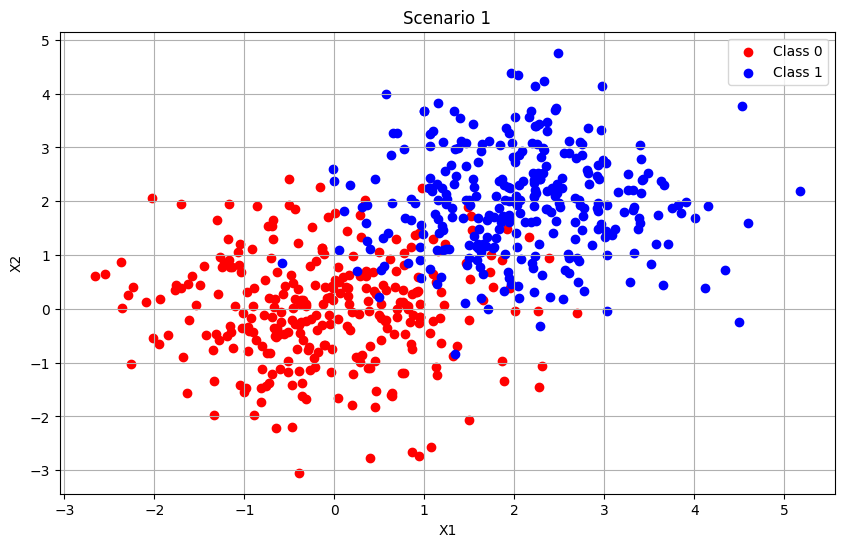

In [16]:
# Scenario 1
np.random.seed(0)
n = 300
mean = [0, 0]
cov = [[1, 0], [0, 1]]
X1 = np.random.multivariate_normal(mean, cov, n)
y1 = np.zeros(n)

mean = [2, 2]
cov = [[1, 0], [0, 1]]
X2 = np.random.multivariate_normal(mean, cov, n)
y2 = np.ones(n)

X_s1 = np.concatenate((X1, X2))
y_s2 = np.concatenate((y1, y2))

plt.figure(figsize=(10, 6))
plt.scatter(X1[:, 0], X1[:, 1], color='r', label='Class 0')
plt.scatter(X2[:, 0], X2[:, 1], color='b', label='Class 1')
plt.title('Scenario 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

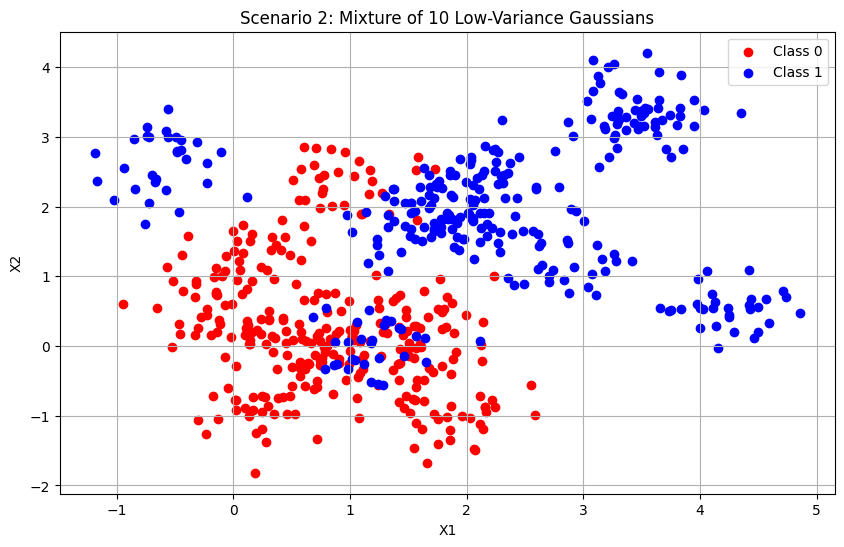

In [27]:
# Scenario 2: Mixture of 10 low-variance Gaussians
np.random.seed(0)
n = 300 
n_gaussians = 10 
low_variance = [[0.1, 0], [0, 0.1]]  # low variance

# distribution of means
meta_mean_class_1 = [0, 0]
meta_cov_class_1 = [[1, 0], [0, 1]]
meta_mean_class_2 = [2, 2]
meta_cov_class_2 = [[1, 0], [0, 1]]

# Generate means for the Gaussian components
means_class_1 = np.random.multivariate_normal(meta_mean_class_1, meta_cov_class_1, n_gaussians)
means_class_2 = np.random.multivariate_normal(meta_mean_class_2, meta_cov_class_2, n_gaussians)

# Generate data for each mixture component
X1 = np.vstack([np.random.multivariate_normal(mean, low_variance, n // n_gaussians) for mean in means_class_1])
X2 = np.vstack([np.random.multivariate_normal(mean, low_variance, n // n_gaussians) for mean in means_class_2])

y1 = np.zeros(X1.shape[0])
y2 = np.ones(X2.shape[0])

X_s2 = np.concatenate((X1, X2))
y_s2 = np.concatenate((y1, y2))

# Plotting the generated data
plt.figure(figsize=(10, 6))
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 0')
plt.scatter(X2[:, 0], X2[:, 1], color='blue', label='Class 1')
plt.title('Scenario 2: Mixture of 10 Low-Variance Gaussians')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()


# 5 Explain why decision trees are unstable procedures
Is this an issue for predictive or descriptive analysis? How does this translates to bias-variance?

Decision trees are unstable procedures because they are highly sensitive to small changes in the data. This sensitivity can lead to different tree structures from minor variations in the training data, thus higher variance in the models predictions. THe instability is a problem for both descriptive and predictive analysis (predicitive is probably worse) since they are less robust and generalizable to new data. In descriptive analysis the might lead to wrong conclusions when e.g. including vs excluding outliers or similar.

They are usually high variance low bias, but can be improved with pruning. Hence they are prone to overfitting.

# 6 Split the data set into a training set and a test set
Fit a tree to the
training set. Plot the tree, and interpret the results. Vary the split of the dataset
(track the random seed you use) 5 times and study the stability of the tree you obtain.
Comments on the results obtained, taking into consideration the previous answer


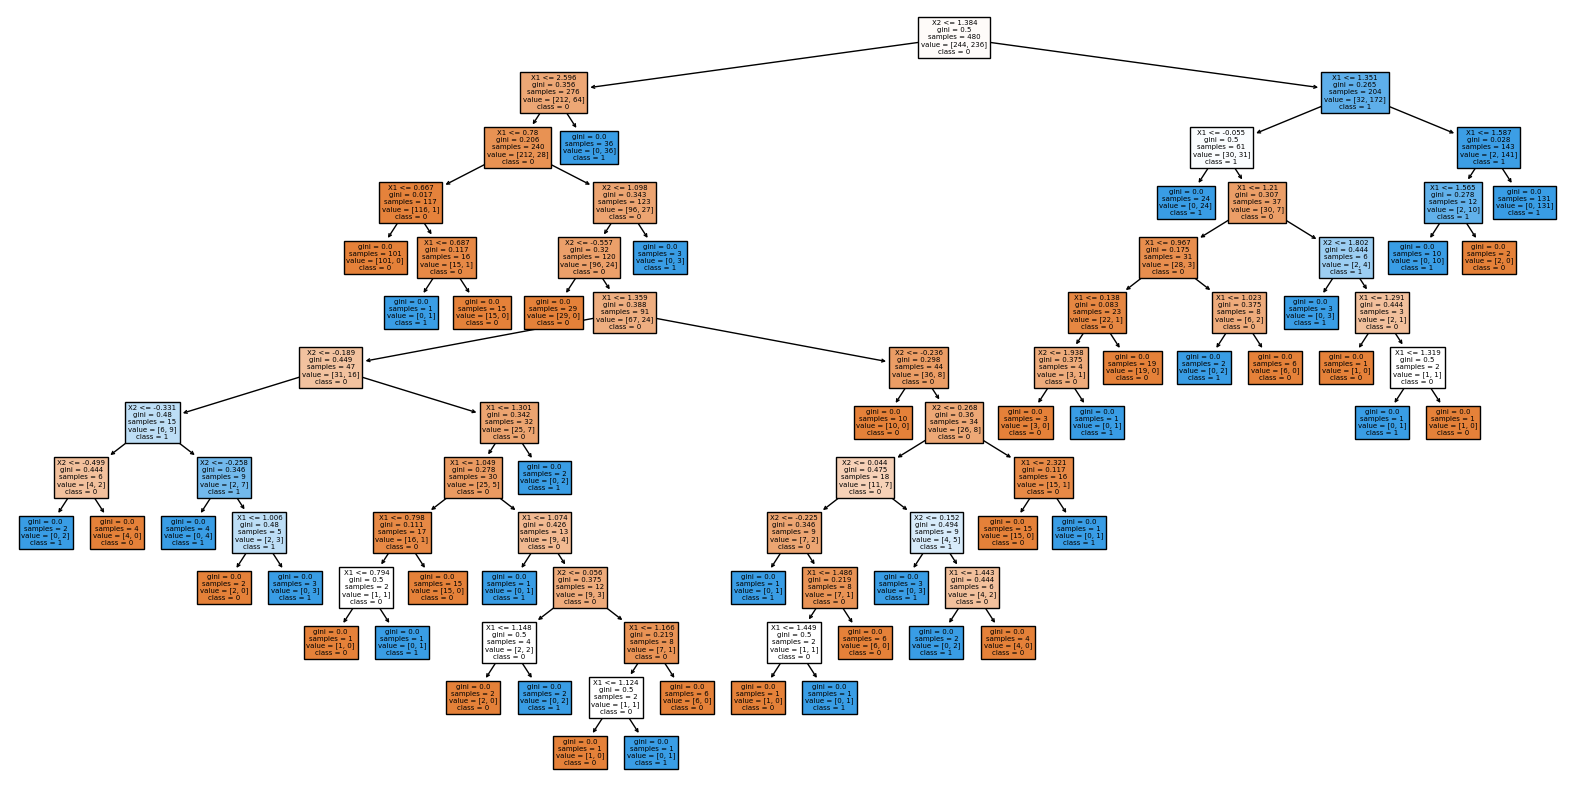

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# split data
X_train, X_test, y_train, y_test = train_test_split(X_s2, y_s2, test_size=0.2, random_state=0)

# fit tree
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# plot tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=['X1', 'X2'], class_names=['0', '1'])
plt.show()



In [29]:
# check accuracy on train and test set
train_accuracy = tree.score(X_train, y_train)
test_accuracy = tree.score(X_test, y_test)

print(f'Training accuracy: {train_accuracy:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')

Training accuracy: 1.00
Test accuracy: 0.88


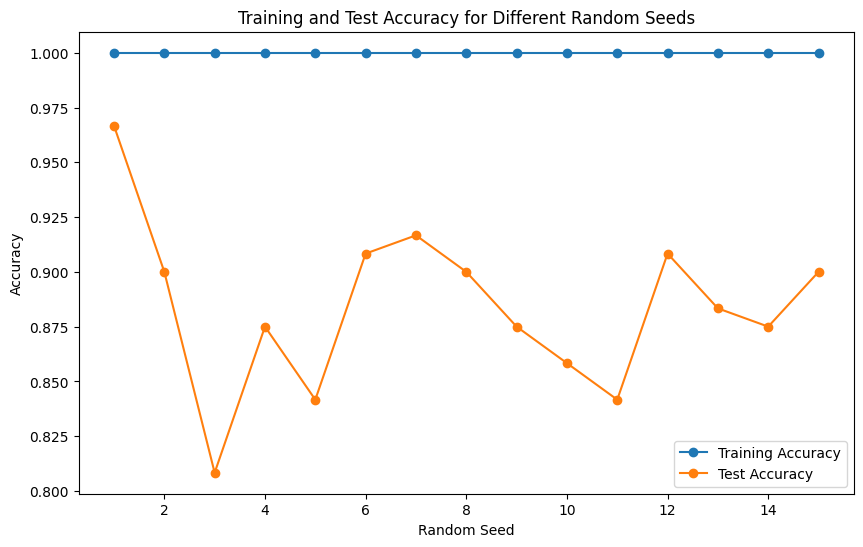

In [33]:
# use random seeds 1 to 5
train_accs = []
test_accs = []
for seed in range(1, 16):
    X_train, X_test, y_train, y_test = train_test_split(X_s2, y_s2, test_size=0.2, random_state=seed+10)
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    train_accuracy = tree.score(X_train, y_train)
    test_accuracy = tree.score(X_test, y_test)
    train_accs.append(train_accuracy)
    test_accs.append(test_accuracy)
    
    
# plot accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16, 1), train_accs, label='Training Accuracy', marker='o')
plt.plot(range(1, 16, 1), test_accs, label='Test Accuracy', marker='o')
plt.title('Training and Test Accuracy for Different Random Seeds')
plt.xlabel('Random Seed')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 7 What are advantages and disadvantages of k-fold cross-validation relative to the validation set approach? LOOCV?

# 8 How can you use bootstrapping in machine learning?

# 9 Use cross-validation in order to determine the optimal level of tree complexity
Does pruning the tree improve the test error rate? Compare the confusion matrix and training error rates between the pruned and unpruned trees for both training and test dataset.

Optimal Depth seems to be 4, and pruning does improve testing accuracy (training accuracy goes down a bit)

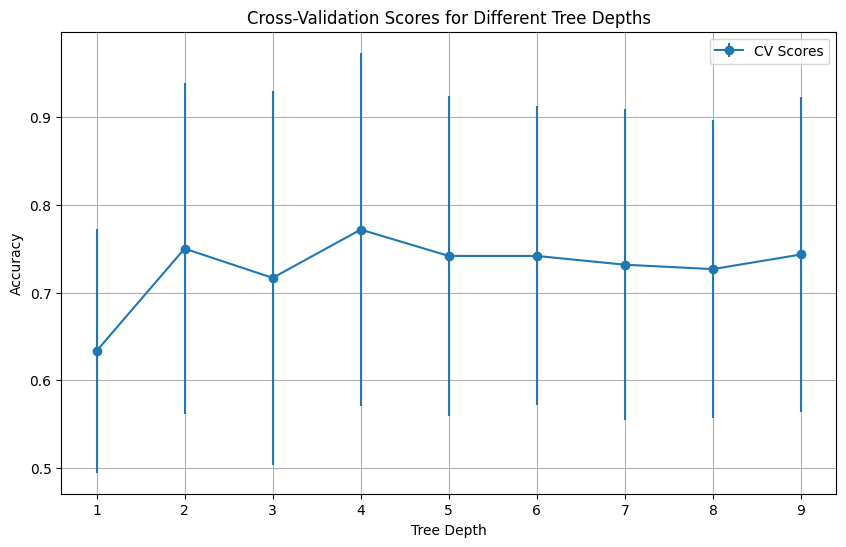

In [50]:
from sklearn.model_selection import cross_val_score

# cross-validation
cv_scores = []
for depth in range(1, 10):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    scores = cross_val_score(tree, X_s2, y_s2, cv=5)
    cv_scores.append((depth, scores.mean(), scores.std()))
    
# plot cross-validation scores
cv_scores = np.array(cv_scores)
plt.figure(figsize=(10, 6))
plt.errorbar(cv_scores[:, 0], cv_scores[:, 1], yerr=cv_scores[:, 2], fmt='o-', label='CV Scores')
plt.title('Cross-Validation Scores for Different Tree Depths')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

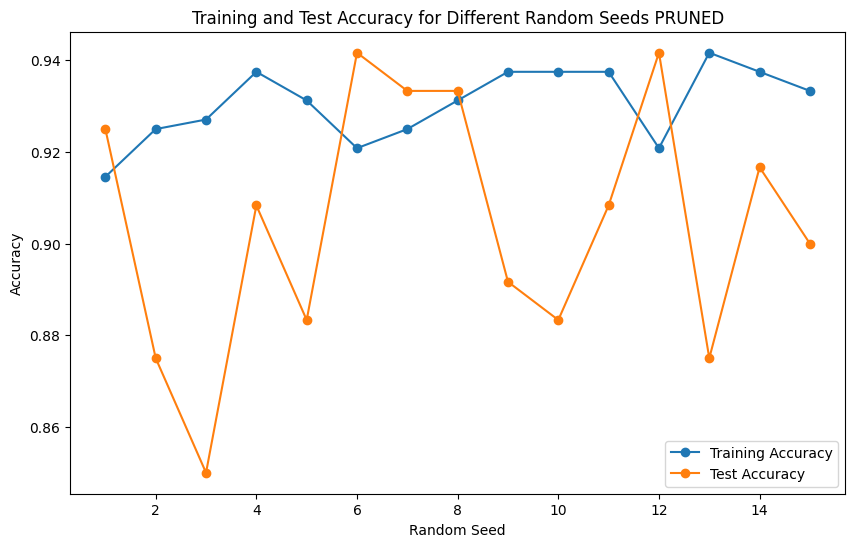

In [37]:
# use random seeds 1 to 5
train_accs = []
test_accs = []
for seed in range(1, 16):
    X_train, X_test, y_train, y_test = train_test_split(X_s2, y_s2, test_size=0.2, random_state=seed+10)
    tree = DecisionTreeClassifier(random_state=0, max_depth=4)
    tree.fit(X_train, y_train)
    train_accuracy = tree.score(X_train, y_train)
    test_accuracy = tree.score(X_test, y_test)
    train_accs.append(train_accuracy)
    test_accs.append(test_accuracy)
    
    
# plot accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16, 1), train_accs, label='Training Accuracy', marker='o')
plt.plot(range(1, 16, 1), test_accs, label='Test Accuracy', marker='o')
plt.title('Training and Test Accuracy for Different Random Seeds PRUNED')
plt.xlabel('Random Seed')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
# compare confusion matrix and training error rates between pruned and unpruned trees
from sklearn.metrics import confusion_matrix

# unpruned tree
X_train, X_test, y_train, y_test = train_test_split(X_s2, y_s2, test_size=0.2, random_state=0)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# pruned tree
pruned_tree = DecisionTreeClassifier(random_state=0, max_depth=4)
pruned_tree.fit(X_train, y_train)

# confusion matrix
conf_matrix = confusion_matrix(y_test, tree.predict(X_test))
pruned_conf_matrix = confusion_matrix(y_test, pruned_tree.predict(X_test))

print('Confusion Matrix (Unpruned Tree) - Testing Set:')
print(conf_matrix)
print('\nConfusion Matrix (Pruned Tree) - Testing Set:')
print(pruned_conf_matrix)

# confusion matrices of the training set
conf_matrix_train = confusion_matrix(y_train, tree.predict(X_train))
pruned_conf_matrix_train = confusion_matrix(y_train, pruned_tree.predict(X_train))

print('\nConfusion Matrix (Unpruned Tree - Training Set):')
print(conf_matrix_train)
print('\nConfusion Matrix (Pruned Tree - Training Set):')
print(pruned_conf_matrix_train)


Confusion Matrix (Unpruned Tree) - Testing Set:
[[49  7]
 [ 7 57]]

Confusion Matrix (Pruned Tree) - Testing Set:
[[53  3]
 [10 54]]

Confusion Matrix (Unpruned Tree - Training Set):
[[244   0]
 [  0 236]]

Confusion Matrix (Pruned Tree - Training Set):
[[242   2]
 [ 28 208]]


In [43]:
# training error rates
train_error = 1 - tree.score(X_train, y_train)
pruned_train_error = 1 - pruned_tree.score(X_train, y_train)

print(f'Training Error Rate (Unpruned Tree): {train_error:.2f}')
print(f'Training Error Rate (Pruned Tree): {pruned_train_error:.2f}')

# testing error rates
test_error = 1 - tree.score(X_test, y_test)
pruned_test_error = 1 - pruned_tree.score(X_test, y_test)

print(f'Test Error Rate (Unpruned Tree): {test_error:.2f}')
print(f'Test Error Rate (Pruned Tree): {pruned_test_error:.2f}')

Training Error Rate (Unpruned Tree): 0.00
Training Error Rate (Pruned Tree): 0.06
Test Error Rate (Unpruned Tree): 0.12
Test Error Rate (Pruned Tree): 0.11


# 10 Use k-fold cross validation 
Report the accuracy of the training and test samples, as well as the size of each of the trees you obtained

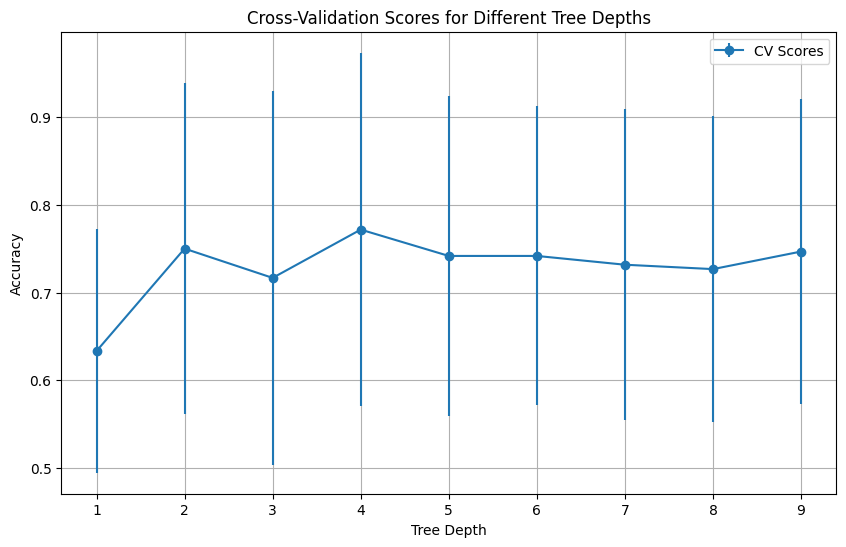

In [45]:
from sklearn.model_selection import cross_val_score

# cross-validation
cv_scores = []
for depth in range(1, 10):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=2)
    scores = cross_val_score(tree, X_s2, y_s2, cv=5)
    cv_scores.append((depth, scores.mean(), scores.std()))
    
# plot cross-validation scores
cv_scores = np.array(cv_scores)
plt.figure(figsize=(10, 6))
plt.errorbar(cv_scores[:, 0], cv_scores[:, 1], yerr=cv_scores[:, 2], fmt='o-', label='CV Scores')
plt.title('Cross-Validation Scores for Different Tree Depths')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Setup KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Classifier
dt_classifier = DecisionTreeClassifier(random_state=0)

# Lists to store results
training_accuracies = []
test_accuracies = []
tree_sizes = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_s2):
    X_train, X_test = X_s2[train_index], X_s2[test_index]
    y_train, y_test = y_s2[train_index], y_s2[test_index]
    
    # Train the classifier
    dt_classifier.fit(X_train, y_train)
    
    # Evaluate on the training set
    y_pred_train = dt_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    training_accuracies.append(train_accuracy)
    
    # Evaluate on the test set
    y_pred_test = dt_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_accuracies.append(test_accuracy)
    
    # Store the size of the tree
    tree_sizes.append(dt_classifier.tree_.node_count)

# Reporting results
results_df = pd.DataFrame({
    'Fold': range(1, 6),
    'Training Accuracy': training_accuracies,
    'Test Accuracy': test_accuracies,
    'Tree Size (nodes)': tree_sizes
})

# Display the DataFrame
results_df.set_index('Fold')
results_df

,Fold,Training Accuracy,Test Accuracy,Tree Size (nodes)
0,1,1.0,0.883333,87
1,2,1.0,0.908333,97
2,3,1.0,0.908333,89
3,4,1.0,0.891667,97
4,5,1.0,0.916667,101
